In [15]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
import matplotlib.pyplot as plt
from sklearn import svm, datasets

from IPython import display
display.set_matplotlib_formats('svg')

c:\Users\NC.DESKTOP-8TG1B6T\Envs\learnML\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  


# SUPPORT VECTOR MACHINE

## LINEAR KERNEL

In [16]:
fake_data = [[0,0,'A'],[1,1,'A'],[2,3,'B'],[2,0,'A'],[3,4,'B']]
data = pd.DataFrame(fake_data, columns=['x1','x2','r'])

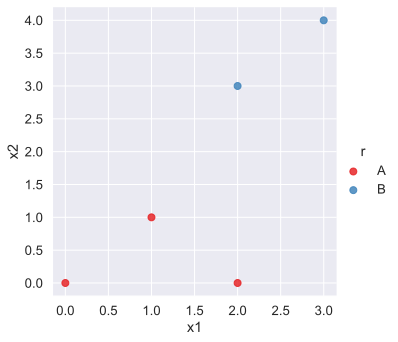

In [17]:
sns.lmplot(x ='x1', y ='x2', data = data,hue='r',
palette='Set1',
fit_reg=False,
scatter_kws={"s": 50})

In [18]:
#---Converting the Columns as Matrices---
points = data[['x1','x2']].values
result = data['r']
clf = svm.SVC(kernel = 'linear')
clf.fit(points, result)
print('Vector of weights (w) = ',clf.coef_[0])
print('b = ',clf.intercept_[0])
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ',
np.abs(clf.dual_coef_))

Vector of weights (w) =  [0.4 0.8]
b =  -2.2
Indices of support vectors =  [1 2]
Support vectors =  [[1. 1.]
 [2. 3.]]
Number of support vectors for each class =  [1 1]
Coefficients of the support vector in the decision function =  [[0.4 0.4]]


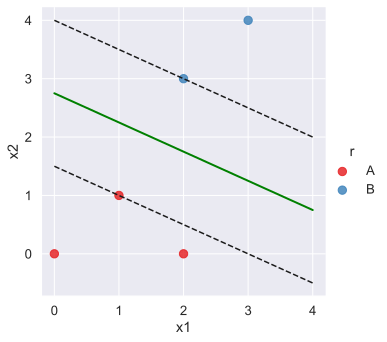

In [19]:
#---w is the vector of weights---
w = clf.coef_[0]
#---find the slope of the hyperplane---
slope = -w[0] / w[1]
b = clf.intercept_[0]
#---find the coordinates for the hyperplane---
xx = np.linspace(0, 4)
yy = slope * xx - (b / w[1])
#---plot the margins---
s = clf.support_vectors_[0] #---first support vector---
yy_down = slope * xx + (s[1] - slope * s[0])
s = clf.support_vectors_[-1] #---last support vector---
yy_up = slope * xx + (s[1] - slope * s[0])
#---plot the points---
sns.lmplot(x='x1', y='x2', data=data, hue='r', palette='Set1',
fit_reg=False, scatter_kws={"s": 70})
#---plot the hyperplane---
plt.plot(xx, yy, linewidth=2, color='green');
#---plot the 2 margins---
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [20]:
# making predict
print(clf.predict([[3,3]])[0]) # 'B'
print(clf.predict([[4,0]])[0]) # 'A'
print(clf.predict([[2,2]])[0]) # 'B'
print(clf.predict([[1,2]])[0]) # 'A'

B
A
B
A


## KERNEL TRICK 

<p><b>Trong trường hợp bài toán không phải 'linearly separable':</b></p>
<ul>
  <li>1. Ánh xạ sang không gian nhiều chiều hơn (Tính toán lâu hơn)</li>
  <li>2. Kernel function: RBF Kernel, Polynomial kernel</li>
</ul>

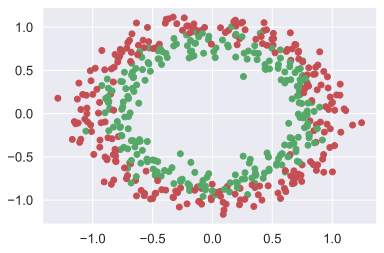

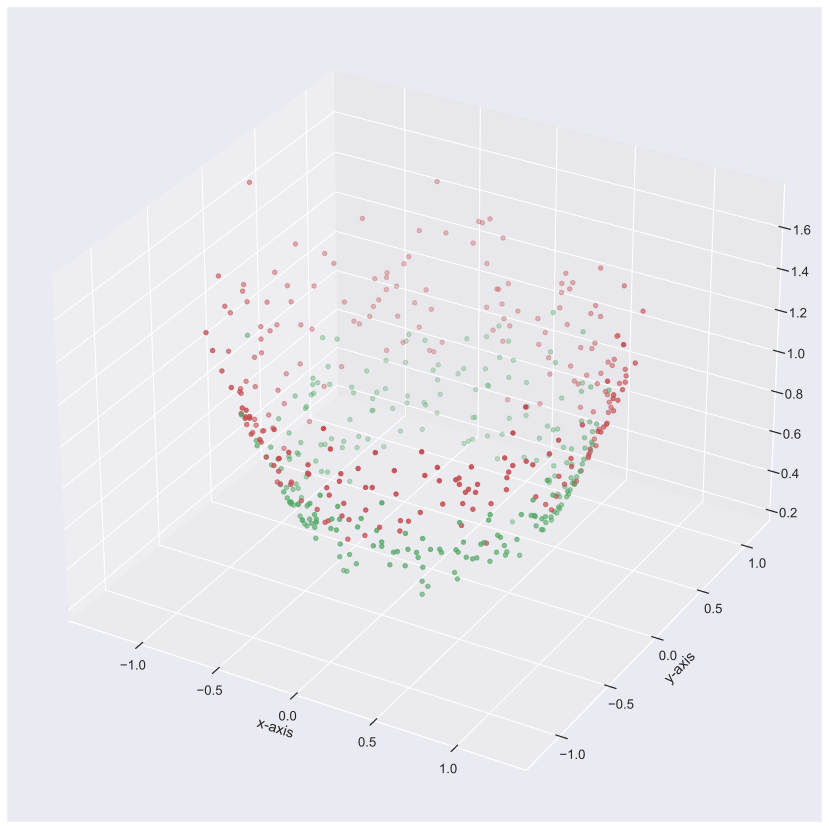

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles
#---X is features and c is the class labels---
X, c = make_circles(n_samples=500, noise=0.09)
rgb = np.array(['r', 'g'])
plt.scatter(X[:, 0], X[:, 1], color=rgb[c])
plt.show()
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
z = X[:,0]**2 + X[:,1]**2
ax.scatter(X[:, 0], X[:, 1], z, color=rgb[c])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

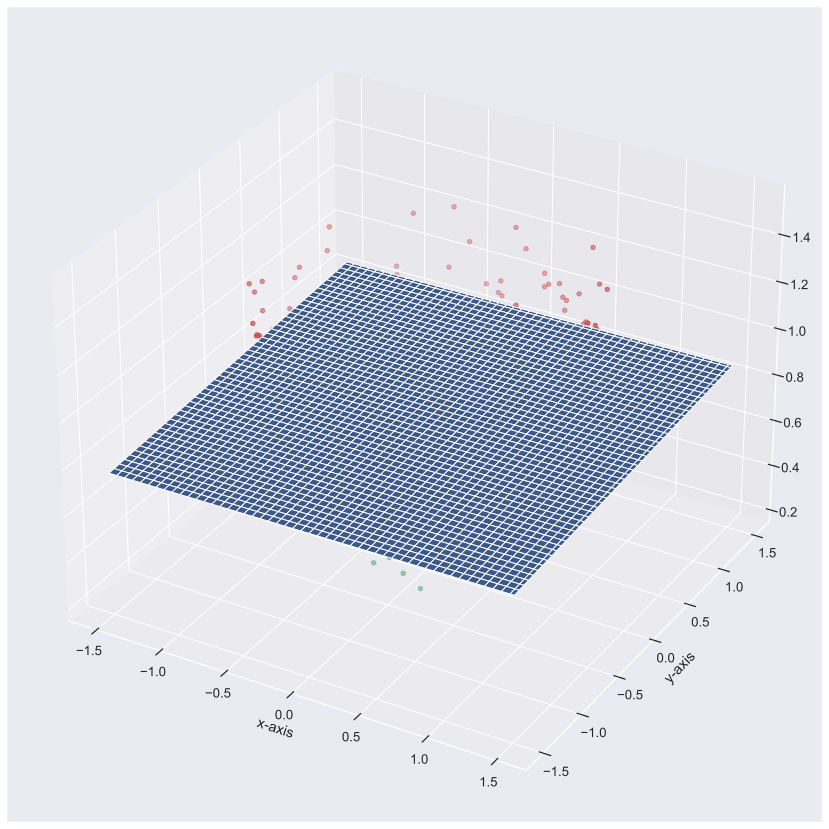

In [22]:
#---X is features and c is the class labels---
X, c = make_circles(n_samples=500, noise=0.09)
z = X[:,0]**2 + X[:,1]**2
rgb = np.array(['r', 'g'])
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], z, color=rgb[c])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
# plt.show()
#---combine X (x-axis,y-axis) and z into single ndarray---
features = np.concatenate((X,z.reshape(-1,1)), axis=1)
#---use SVM for training---
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(features, c)
x3 = lambda x,y: (-clf.intercept_[0] - clf.coef_[0][0] * x-clf.coef_[0][1]
* y) / clf.coef_[0][2]
tmp = np.linspace(-1.5,1.5,100)
x,y = np.meshgrid(tmp,tmp)
ax.plot_surface(x, y, x3(x,y))
plt.show()

### KERNEL FUNCTION

<p>Sử dụng các hàm toán học để chuyển từ dữ liệu 'nonlinearly' sang 'linearly'</p>

In [23]:
iris = datasets.load_iris()
print(iris.data[0:5]) # print first 5 rows
print(iris.feature_names) # ['sepal length (cm)', 'sepal width (cm)',
# 'petal length (cm)', 'petal width (cm)']
print(iris.target[0:5]) # print first 5 rows
print(iris.target_names) # ['setosa' 'versicolor' 'virginica']

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0]
['setosa' 'versicolor' 'virginica']


In [24]:
# Sử dụng 2 feature để dễ hình dung
X = iris.data[:, :2]
y = iris.target

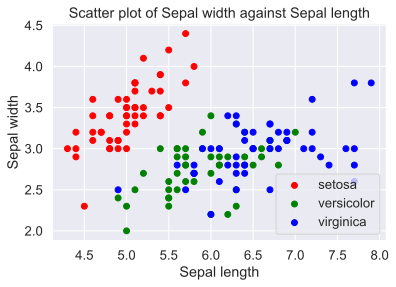

In [25]:
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
  plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Scatter plot of Sepal width against Sepal length')
plt.show()

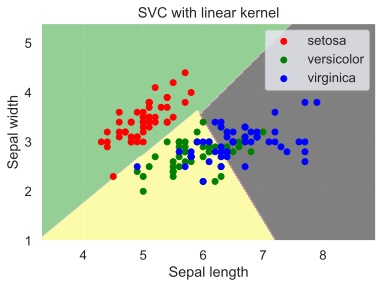

In [26]:
C = 1 # SVM regularization parameter
clf = svm.SVC(kernel='linear', C=C).fit(X, y)
title = 'SVC with linear kernel'
#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#---step size in the mesh---
h = (x_max / x_min)/100
#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)
#---plot the training points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
  plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(title)
plt.legend(loc='best', shadow=False, scatterpoints=1)

<p>Trong đó C là 1 hyperparameter dùng để đánh đổi giữa việc tạo ra 1 đường phân tách tập trung vào việc phân loại các điểm chính xác (low bias) hoặc bỏ qua 1 số mẫu phân loại sai để tạo ra margin lớn hơn (low variance)</p>

<img src="image\highc.png"> <img src="image\lowc.png">

#### RBF Kernel (Gaussian Kernel)

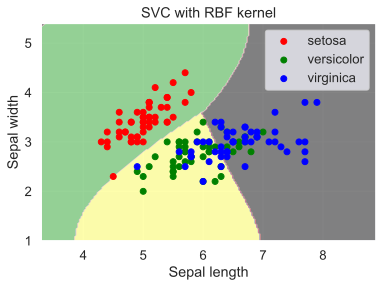

In [27]:
C = 1
clf = svm.SVC(kernel='rbf', gamma='auto', C=C).fit(X, y)
title = 'SVC with RBF kernel'
#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#---step size in the mesh---
h = (x_max / x_min)/100
#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)
#---plot the training points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
  plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(title)
plt.legend(loc='best', shadow=False, scatterpoints=1)

<p>Gamma: Gamma càng lớn, mô hình càng fit với tập dữ liệu train (dễ overfitting)</p>

To summarize, C controls the smoothness of the boundary and Gamma determines if the points are overfitted.

<img src="image\rbf.png">

#### POLYNOMIAL KERNEL

In [30]:
C = 1 # SVM regularization parameter
clf = svm.SVC(kernel='poly', degree=4, C=C, gamma='auto').fit(X, y)
title = 'SVC with polynomial (degree 4) kernel'

<img src="image\poly.png">